In [1]:
import sys
sys.path.append('../..')
import numpy as np
from qubap.qiskit.luciano.quantum_chemistry import BeH2

ModuleNotFoundError: No module named 'qubap'

In [ ]:
def hamiltonian2list( ops ):

    ops_strings  = []
    coefficients = []

    for pauli in ops.to_pauli_op():
        ops_strings.append( str(pauli.primitive) )
        coefficients.append( pauli.coeff )

    return ops_strings, coefficients

In [ ]:
options = [ (False,[]),
            (True, []),
            (True, [6]),
            (True, [3,6])
            ]

for freeze_core, remove_orbitals in options:

    ops, init_state = BeH2(freeze_core=freeze_core, remove_orbitals=remove_orbitals, initial_state=True)
    ops_strings, coefficients = hamiltonian2list( ops )
    num_qubits = ops.num_qubits 
    dictionary = {}
    dictionary['molecule']        = 'BeH2'
    dictionary['freeze_core']     = freeze_core
    dictionary['remove_orbitals'] = remove_orbitals
    dictionary['num_qubits']      = ops.num_qubits
    dictionary['hamiltonian']     = ( ops_strings, coefficients )
    dictionary['initial_state']   = init_state.qasm()

    np.save( 'molecule_BeH2_'+str(num_qubits), np.array([dictionary], dtype=object)   )

In [ ]:
ops_strings, coefficients = hamiltonian2list( ops )

In [ ]:
circ_str = init_state.qasm()

In [ ]:
from qiskit import  QuantumCircuit

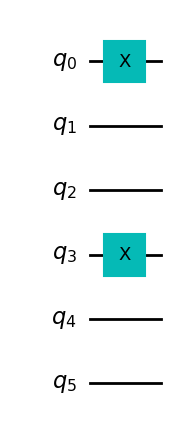

In [ ]:
QuantumCircuit.from_qasm_str( circ_str ).draw('mpl')

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table